In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv"
df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [3]:
df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [4]:
df = df.dropna()


# Logistic Classification

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=2000, solver='lbfgs')
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=2000)

In [8]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

##### Evaluasi

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

print(f"AUC: {roc_auc_score(y_test, y_pred_proba, multi_class='ovr')}")




Accuracy: 0.6166666666666667
Precision: 0.5605297157622737
Recall: 0.6166666666666667
F1 Score: 0.5782139379607736
AUC: 0.7622020961916107


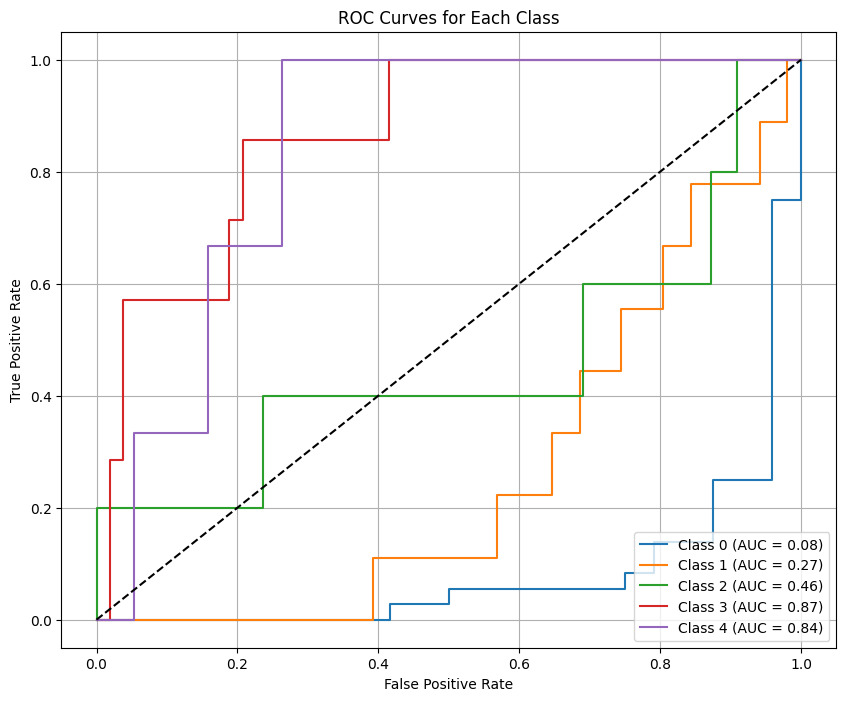

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

classes = sorted(y.unique())

for i in classes:

    y_test_bin = (y_test == i).astype(int)
    y_pred_proba_class = y_pred_proba[:, i-1]
    
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba_class)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

## Logistic Regression, Accuracy, Precision, Recall, F1, ROC, AUC

### 1. **Logistic Regression**
Logistic Regression adalah metode statistika untuk memodelkan probabilitas suatu kejadian berdasarkan variabel independen. Digunakan untuk klasifikasi biner (0 atau 1).

Persamaan Logistic Regression:
$$
P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$
Dimana:
- $P(Y=1)$ adalah probabilitas kelas positif.
- $X$ adalah variabel independen.
- $\beta_0, \beta_1$ adalah parameter regresi.
- $e$ adalah basis logaritma natural.

### 2. **Accuracy**
Akurasi mengukur proporsi prediksi yang benar:
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

### 3. **Precision**
Precision mengukur seberapa banyak prediksi positif yang benar:
$$
Precision = \frac{TP}{TP + FP}
$$

### 4. **Recall (Sensitivity)**
Recall mengukur seberapa banyak sampel positif yang berhasil dideteksi:
$$
Recall = \frac{TP}{TP + FN}
$$

### 5. **F1 Score**
F1 Score adalah rata-rata harmonik antara Precision dan Recall:
$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

### 6. **ROC (Receiver Operating Characteristic) Curve**
ROC adalah kurva yang menggambarkan performa model dengan memplot TPR (True Positive Rate) vs. FPR (False Positive Rate).

### 7. **AUC (Area Under Curve)**
AUC adalah luas di bawah kurva ROC yang menunjukkan seberapa baik model dalam membedakan kelas positif dan negatif.

Semakin tinggi nilai AUC (mendekati 1), semakin baik model dalam membedakan kelas.
